# <center>Data Visualization with Python</center>

## I. Python Scientific Computing & Basic Plotting (Numpy & Matplotlib) 

In this project, we will study a new library in python that offers fast, memory efficient manipulation of vectors, matrices and tensors: **numpy**. We will also study basic plotting of data using the most popular data visualization libraries in the python ecosystem: **matplotlib**. 


In [2]:
# Some IPython magic
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Python scientific computing ecosystem
For scientific computing we need an environment that is easy to use, and provides a couple of tools like manipulating data and visualizing results.
Python is very easy to use, but the downside is that it's not fast at numerical computing. Luckily, we have very eficient libraries for all our use-cases.

### Libraries

#### Core computing libraries

- `numpy` and `scipy`: scientific computing
- `matplotlib`: plotting library

#### Machine Learning
- `sklearn`: machine learning toolkit
- `tensorflow`: deep learning framework developed by google
- `keras`: deep learning framework on top of `tensorflow` for easier implementation
- `pytorch`: deep learning framework developed by facebook


#### Statistics and data analysis
- `pandas`: very popular data analysis library
- `statsmodels`: statistics

We also have advanced interactive environments:
- Ipython: advanced python console
- Jupyter: notebooks in the browser

There are many more scientific libraries available.

Check out these cheetsheets for fast reference to the common libraries:

**Cheat sheets:**
- [python](https://perso.limsi.fr/pointal/_media/python:cours:mementopython3-english.pdf)
- [numpy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [sklearn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

**Other:**
- [Probabilities & Stats Refresher](https://stanford.edu/~shervine/teaching/cs-229/refresher-probabilities-statistics)
- [Algebra](https://stanford.edu/~shervine/teaching/cs-229/refresher-algebra-calculus)

### numpy
`numpy` works with tensors of data, the main data structure is `numpy.array` or `numpy.ndarray`.


**Why it is useful:** Memory-efficient container that provides fast numerical operations.

#### Speed test

In [3]:
%timeit [x**2 for x in range(1000)]

23.9 µs ± 986 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
%timeit np.arange(1000)**2

930 ns ± 8.17 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


It is clear that math operations using numpy arrays are far more efficient computation-wise than using plain python lists. More than that, numpy arrays offer a rich API for ***tensor*** manipulation.

![](https://miro.medium.com/max/1000/0*jGB1CGQ9HdeUwlgB)

#### Working with numpy arrays

a few important attributes of the `array` structure: 
- `ndarray.ndim` - number of axes (tensor rank)
- `ndarray.shape` - tuple, gives dimensions of each axes.
- `ndarray.size` - size of the array (product of elements of `ndarray.shape`)
- `ndarray.dtype` - data type

In [5]:
a = np.array([[2,7,5],[0,-1,2]])
print(a)
print("Dim:  ",a.ndim)
print("Shape:",a.shape)
print("Size: ",a.size)
print("Type: ",a.dtype)

[[ 2  7  5]
 [ 0 -1  2]]
Dim:   2
Shape: (2, 3)
Size:  6
Type:  int64


#### Shape Manipulation

![](https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png)

In [6]:
x = np.array([1,1,2])
x.shape

(3,)

In [7]:
x.reshape(1,3)

array([[1, 1, 2]])

In [8]:
x.reshape(1,4) # this will fail because dimensions don't match

ValueError: cannot reshape array of size 3 into shape (1,4)

In [9]:
x.reshape(1,-1)

array([[1, 1, 2]])

In [10]:
a = np.floor(10*np.random.random((3,4))) # some random matrix
a

array([[9., 0., 0., 0.],
       [9., 0., 5., 3.],
       [0., 1., 1., 8.]])

In [11]:
a.shape # a tuple that describes the shape of the object

(3, 4)

In [12]:
a.ravel() # flattened list

array([9., 0., 0., 0., 9., 0., 5., 3., 0., 1., 1., 8.])

In [13]:
a.T # transpose

array([[9., 9., 0.],
       [0., 0., 1.],
       [0., 5., 1.],
       [0., 3., 8.]])

In [14]:
a.reshape(2,1,-1) # -1 means "as much as you need", such that the dimensions maches the size

array([[[9., 0., 0., 0., 9., 0.]],

       [[5., 3., 0., 1., 1., 8.]]])

![](https://i.pinimg.com/originals/79/08/bd/7908bd4f6d0040cb0df7a20de6d814fc.png)

#### Initializing
- `np.zeros(shape)`
- `np.ones(shape)`
- `np.empty(shape)`
- `np.eye(rows, cols)`

Those functions take as input the shape of an array. 


#### Sequences
- `np.arange` - like Python's `range()`, but returns a `np.array`
- `np.linspace` - n equidistant points in interval [a,b]


In [15]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [16]:
np.linspace(1, 2, 5)

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

#### Math operators
Math operators are applied elementwise. ( `*` is never the dot product for numpy arrays!)

In [17]:
a = np.ones((2,3), dtype=int)
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [19]:
a = a - 1
a

array([[1, 1, 1],
       [1, 1, 1]])

In [20]:
a = a + np.ones_like(a) / 5
a

array([[1.2, 1.2, 1.2],
       [1.2, 1.2, 1.2]])

In [21]:
print("Pointwise multiplication:\n", a * np.ones_like(a) * 2 )
print("Dot Product (matrix multiplication)\n", np.dot(a.T, np.ones_like(a) * 2))

Pointwise multiplication:
 [[2.4 2.4 2.4]
 [2.4 2.4 2.4]]
Dot Product (matrix multiplication)
 [[4.8 4.8 4.8]
 [4.8 4.8 4.8]
 [4.8 4.8 4.8]]


#### Linear Algebra
numpy has implementations of some of the most common algebraic operations.
The most common one, the dot product is implemented both as a method of the array object and as a numpy function.

Matrix multiplication can be performed either using the dot product or `np.matmul`. Using functions from numpy you can 
- find eigenvalues and eigenvectors, 
- compute some decompositions (QR, SVD), 
- compute determinant of a matrix, 
- norm of a vector,
- solve a linear system
- invert a matrix

See [the documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html)

### Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Almost all python plotting frameworks make use of matplotlib behind the scenes. 

Plotting data is an effective way to convey the message hidden in the data. A good plot is worth a thousand words, and it can be difficult to unambiguously transmit your intended message. Different types of plots that represent the same data (i.e. scatter plots, linear plots, bar plots, pie charts etc.) can be perceived differently depending on who's looking.

Check out this article for some tips on better plotting:

[Ten Simple Rules for Better Figures](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)

**NB:** Do note that, regardless of the type of plot and data, ***all*** plots must have properly annotated axis ticks, axis labels, a title and a caption.


For a more comprehensive tutorial on matplotlib, check out this resource:

[Matplotlib Tutorial – A Complete Guide to Python Plot w/ Examples](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/)


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

### The elements of a plot

#### The figure and the axes
The figure is the entire image, the individual plots are called "axes". Here's a description from matplotlib's documentation.

![](https://matplotlib.org/_images/anatomy1.png)

#### Scatter & Line Plots

Scatter plots are used to plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker the position depends on its values in the columns set on the X and Y axes. A third variable can be set to correspond to the color or size of the markers, thus adding yet another dimension to the plot.


We will plot a simple regression line with generated data.

In [23]:
M = 10
N = 5

X = np.random.random(size = 100)
y_true = M * X + N

y_noise = y_true + np.random.normal(size = 100)

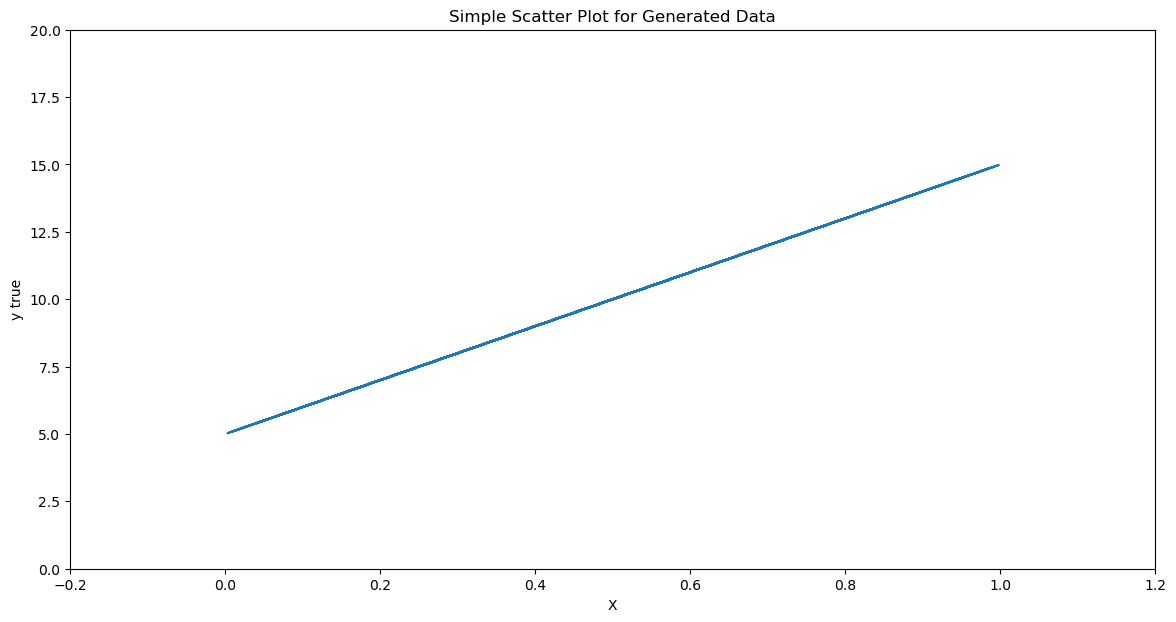

In [24]:
plt.plot(X, y_true)
plt.xlim(-0.2, 1.2)
plt.ylim(0, 20)

plt.xlabel("X")
plt.ylabel("y true")

plt.title("Simple Scatter Plot for Generated Data")
plt.gcf().set_size_inches(14, 7)


Text(0.5, 1.0, 'Simple Scatter Plot for Generated Data')

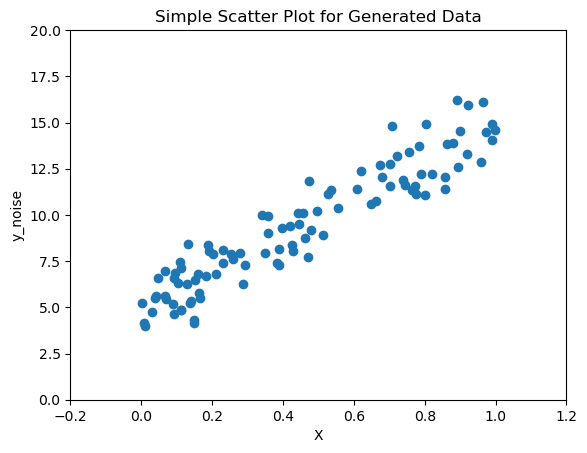

In [25]:
plt.scatter(X, y_noise)
plt.xlim(-0.2, 1.2)
plt.ylim(0, 20)

plt.xlabel("X")
plt.ylabel("y_noise")

plt.title("Simple Scatter Plot for Generated Data")

We can plot the two variables one on top of the other, for a better visualization. Make sure to add a legend, and different coloring, such that it is clear which part of the plot belongs to which set of variables.

Matplotlib also offers a wide range of **markers** to better differentiate between multiple data categories. Check https://matplotlib.org/api/markers_api.html for a full list.

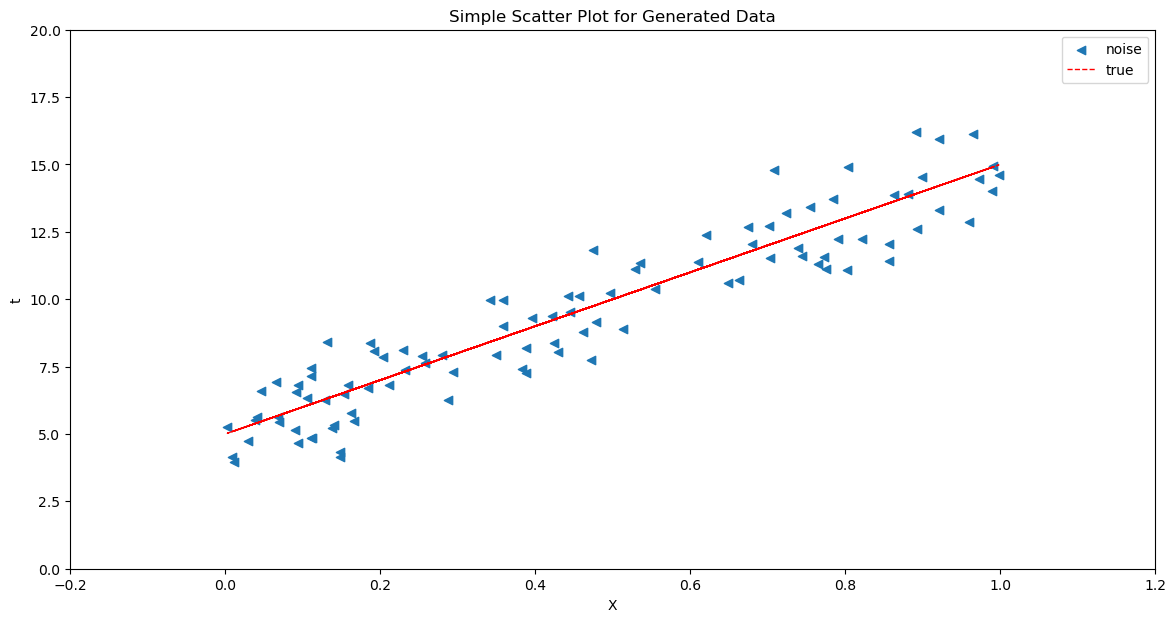

In [26]:
plt.scatter(X, y_noise, label = 'noise', marker = '<')
plt.plot(X, y_true, color = 'r', label = 'true', linestyle = 'dashed', linewidth = 1)

plt.xlim(-0.2, 1.2)
plt.ylim(0, 20)

plt.xlabel("X")
plt.ylabel("t")

plt.title("Simple Scatter Plot for Generated Data")
plt.legend()
plt.gcf().set_size_inches(14, 7)

#### Bar Plots

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

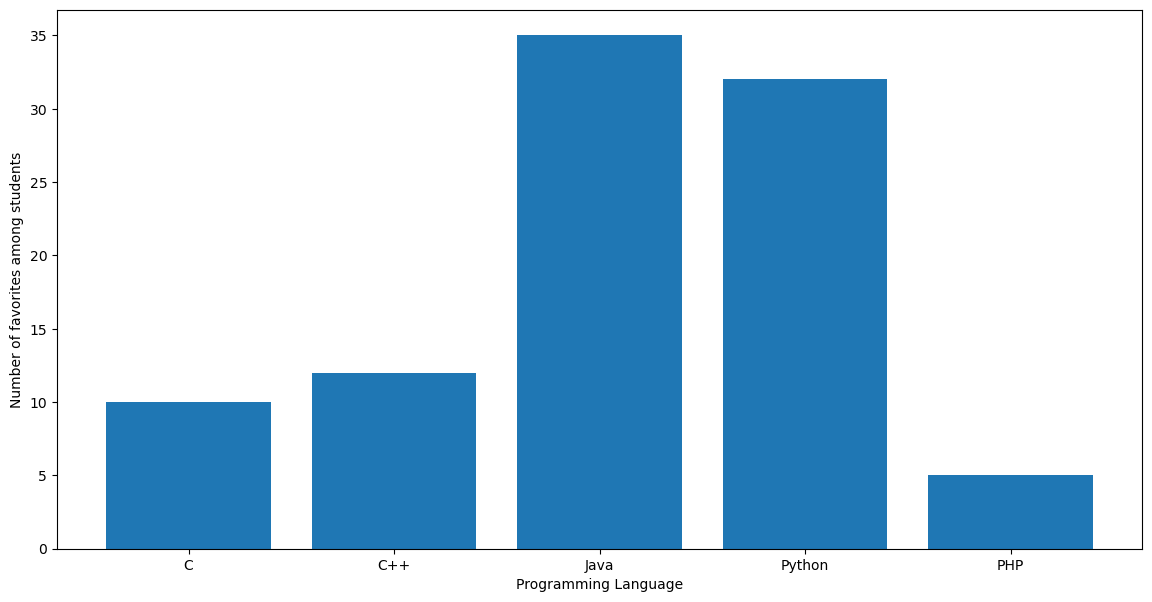

In [27]:
languages = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [10, 12, 35, 32, 5]

ax = plt.subplot()
ax.bar(languages, students)

plt.xlabel('Programming Language')
plt.ylabel("Number of favorites among students")
plt.gcf().set_size_inches(14, 7)

We can make multiple bars for each category. It makes it easier for comparing different quantities with a common category.

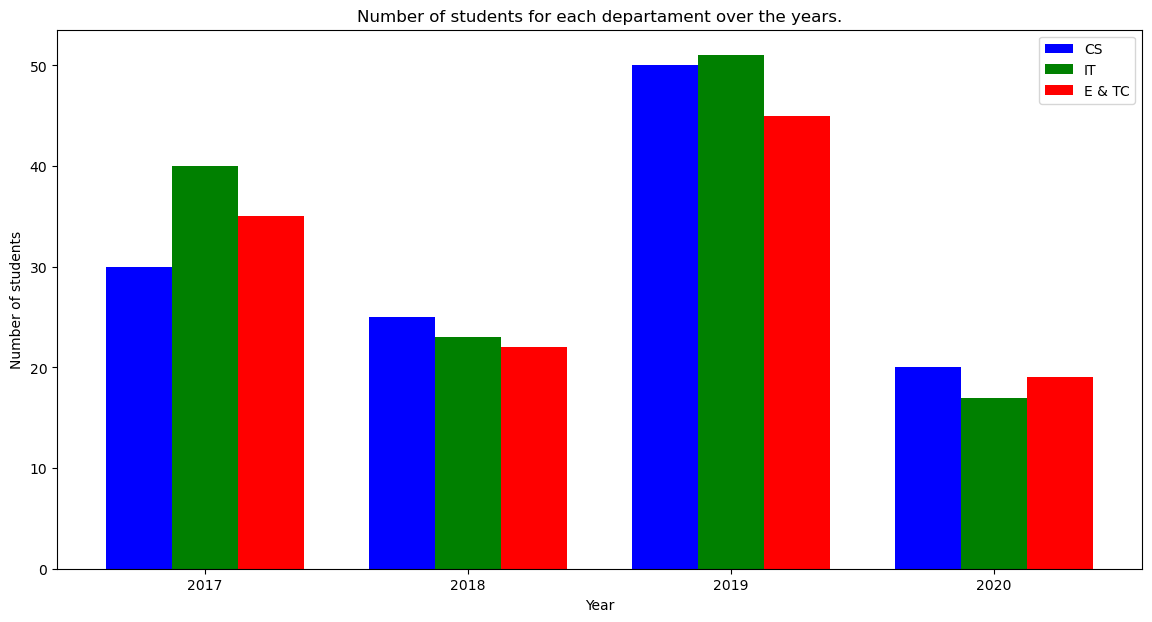

In [28]:
data = [
  [30, 25, 50, 20],
  [40, 23, 51, 17],
  [35, 22, 45, 19]
]

X = np.arange(4)
ax = plt.subplot()

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label = 'CS')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label = 'IT')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label = 'E & TC')

ax.set_xticks(X + 0.25)
ax.set_xticklabels(X + 2017)

plt.xlabel("Year")
plt.ylabel("Number of students")
plt.title("Number of students for each departament over the years.")
ax.legend()
plt.gcf().set_size_inches(14, 7)

#### Box Plots

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.


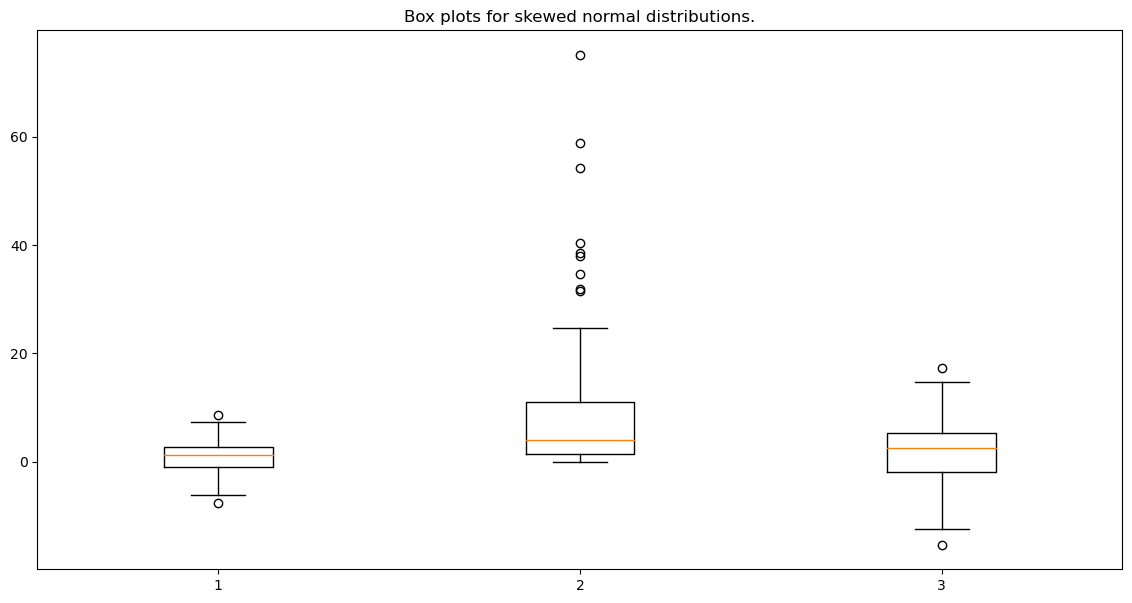

In [29]:
data = np.random.normal(size = 100, scale = 3.0, loc = 1.0)

ax = plt.subplot()
ax.boxplot([data, data ** 2, data * 2])

plt.title("Box plots for skewed normal distributions.")
plt.gcf().set_size_inches(14, 7)

#### Plotting a dataset

Plot different aspects of the Wine Dataset from sklearn. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

**6.1** Create a plot for visualizing the distribution of one features (e.g. alchohol level / malic acid / ash etc.) for each class of wine.

**6.2** Create 3 subplots highlighting different aspects of the dataset. Choose the appropriate plot types (scatter plot, line plot, bar plot, box plot etc.). You can choose various combinations of columns to gain a better understanding of this dataset.

Be creative! You can color your points using the `target` array. Remember to always have labels on your axes, appropriate ticks, a legend where necessary, and a plot title.

In [30]:
from sklearn.datasets import load_wine

wine_dataset = load_wine()

data = wine_dataset['data']
target = wine_dataset['target']

column_names = wine_dataset['feature_names']

In [31]:
column_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

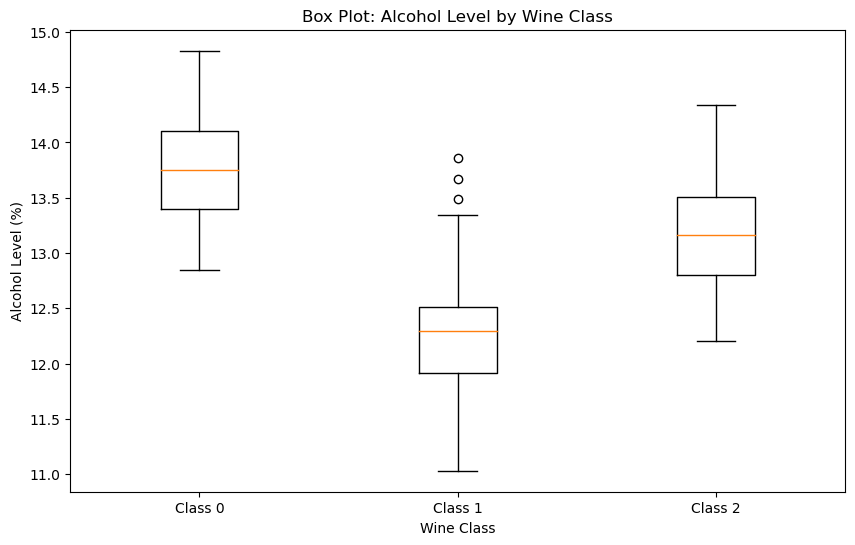

In [32]:
# 6.1

classes = np.unique(target)
alcohol_data = [data[target == cls, column_names.index('alcohol')] for cls in classes]

# Boxplot using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(alcohol_data, labels=[f"Class {cls}" for cls in classes])
plt.title("Box Plot: Alcohol Level by Wine Class")
plt.xlabel("Wine Class")
plt.ylabel("Alcohol Level (%)")
plt.show()


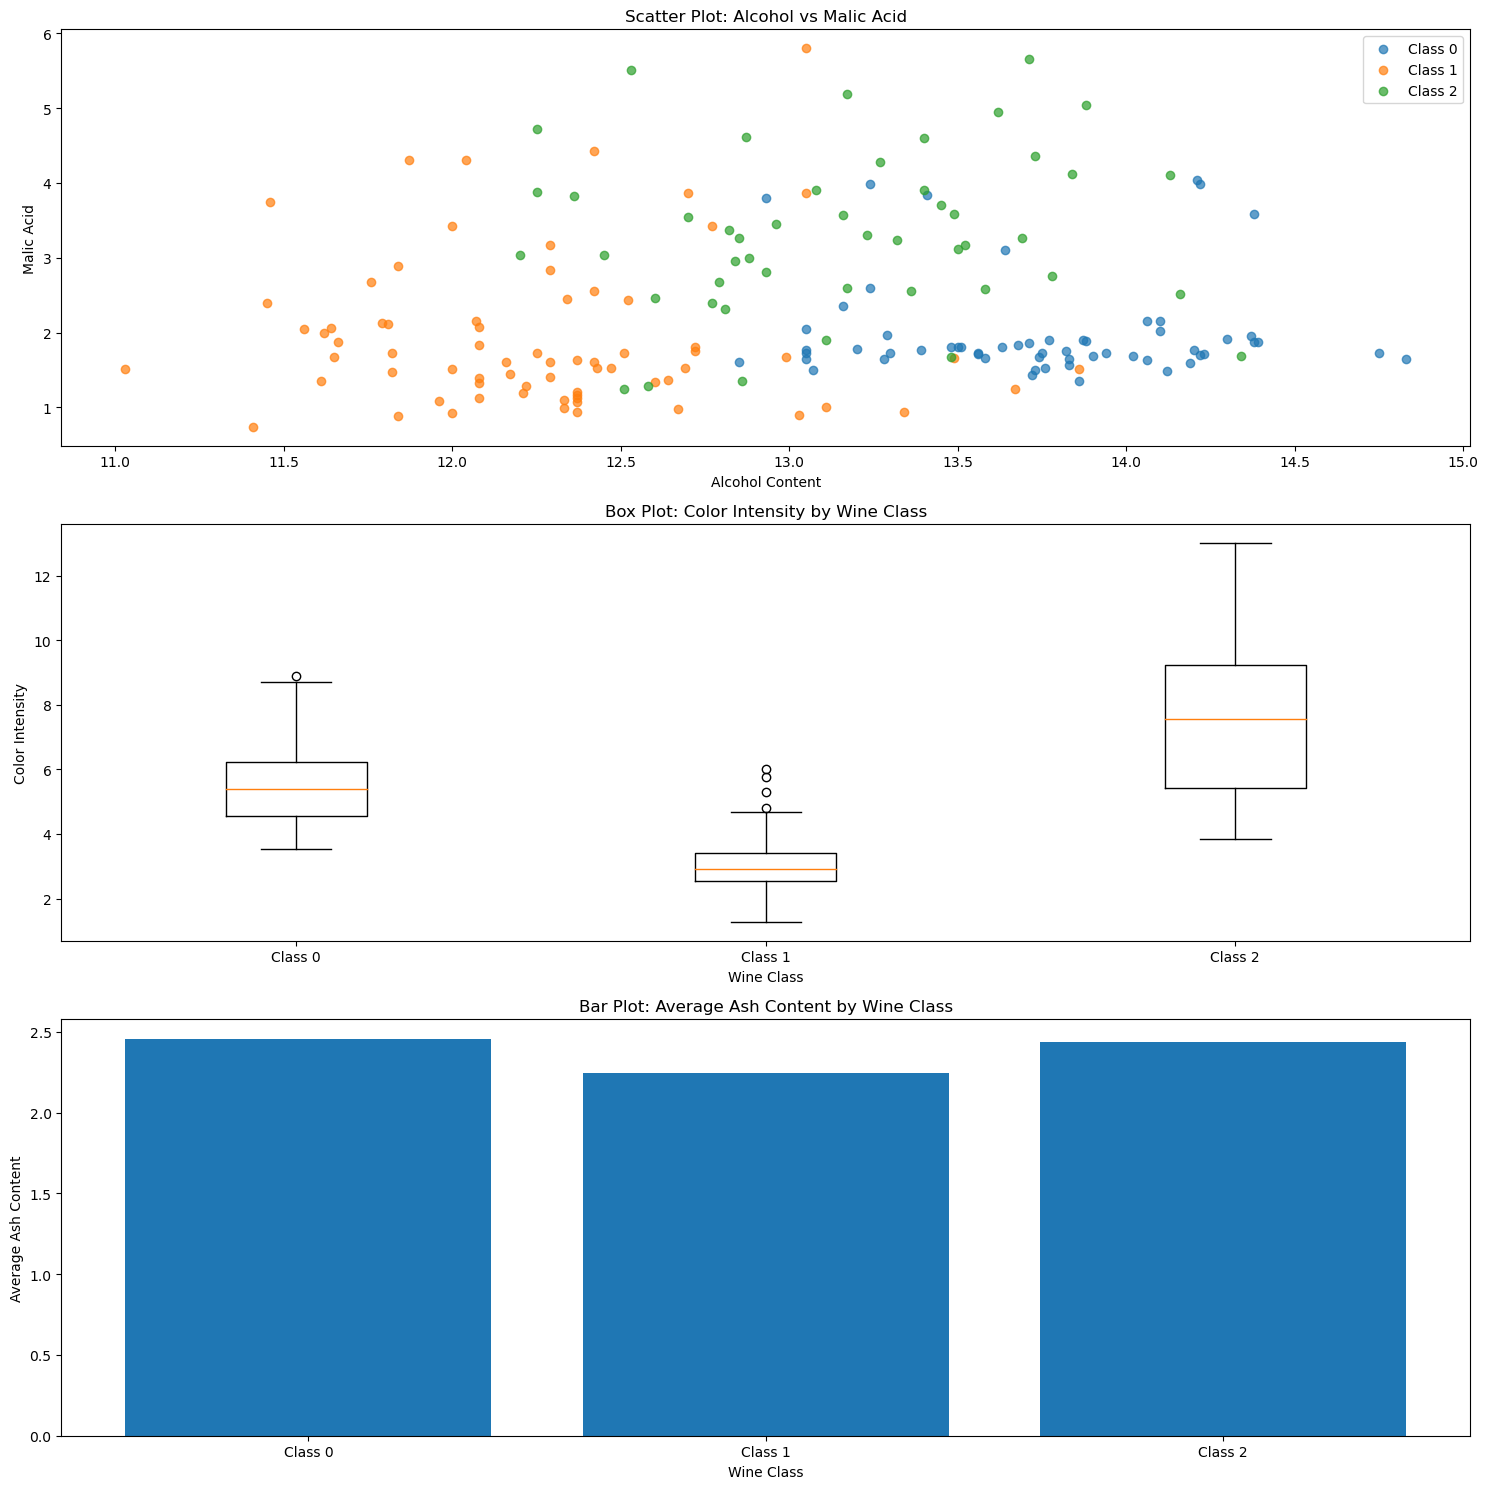

In [33]:
# 6.2

# Preparing data with numpy
alcohol = data[:, column_names.index('alcohol')]
malic_acid = data[:, column_names.index('malic_acid')]
color_intensity = data[:, column_names.index('color_intensity')]
ash = data[:, column_names.index('ash')]

# Creating subplots
plt.figure(figsize=(15, 15))

# Scatter plot: Alcohol vs Malic Acid
plt.subplot(3, 1, 1)
for cls in classes:
    mask = target == cls
    plt.scatter(alcohol[mask], malic_acid[mask], label=f"Class {cls}", alpha=0.7)
plt.title("Scatter Plot: Alcohol vs Malic Acid")
plt.xlabel("Alcohol Content")
plt.ylabel("Malic Acid")
plt.legend()

# Boxplot: Color Intensity across classes
plt.subplot(3, 1, 2)
color_data = [color_intensity[target == cls] for cls in classes]
plt.boxplot(color_data, labels=[f"Class {cls}" for cls in classes])
plt.title("Box Plot: Color Intensity by Wine Class")
plt.xlabel("Wine Class")
plt.ylabel("Color Intensity")

# Bar plot: Average Ash content by class
plt.subplot(3, 1, 3)
ash_means = [ash[target == cls].mean() for cls in classes]
plt.bar([f"Class {cls}" for cls in classes], ash_means)
plt.title("Bar Plot: Average Ash Content by Wine Class")
plt.xlabel("Wine Class")
plt.ylabel("Average Ash Content")

# Show plots
plt.tight_layout()
plt.show()


## II - Data Manipulation & Advanced Plotting (pandas, seaborn & 3D Plotting)

In this lab, we will study data manipulation and visualization using **pandas**, and explore the high level API of **seaborn** for generating visually appealing plots. We will also take a look at 3D plotting using **mplot3d**. 

Check out these cheetsheets for fast reference to the common libraries:

**Cheat sheets:**
- [python](https://perso.limsi.fr/pointal/_media/python:cours:mementopython3-english.pdf)
- [numpy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [sklearn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

**Other:**
- [Probabilities & Stats Refresher](https://stanford.edu/~shervine/teaching/cs-229/refresher-probabilities-statistics)
- [Algebra](https://stanford.edu/~shervine/teaching/cs-229/refresher-algebra-calculus)

### Pandas Crash Course

Pandas is a high-level data manipulation tool. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

Check this official guide for a started in pandas:

[10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

In [34]:
import pandas as pd

Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

![](https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png)



Let's load a publicly available *.csv* dataset into a pandas ***DataFrame***. We will use the popular *iris* dataset.


In [35]:
file_name = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

df = pd.read_csv(file_name)
df.head(n = 10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


A dataframe's **.describe()** method offers descriptive statistics which include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [36]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's see some ways in which we can access the DataFrames' data. Each column of a pandas `DataFrame` is a pandas `Series`.

In [37]:
df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

We can do any vectorized operation on a `Series`. Moreover, a pandas `Series` allows us to do conditional selection of rows in a `DataFrame`.

In [38]:
setosas = df[df['species'] == 'setosa']

setosas.head() # only setosa species selected

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can add a new column to a pandas `DataFrame`, simply by specifying its name and its contents.

**NB**: the data added to the new column must be the same length as the rest of the `DataFrame`.

In [39]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width'] # adding new columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00


We can work with `Series` as we work with numpy arrays. We perform Min-Max normalization on the `petal_length` column.

In [40]:
# Min-Max Normalization
df['petal_length'] = (df['petal_length'] - df['petal_length'].min()) / (df['petal_length'].max() - df['petal_length'].min())
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,0.067797,0.2,setosa,17.85
1,4.9,3.0,0.067797,0.2,setosa,14.70
2,4.7,3.2,0.050847,0.2,setosa,15.04
3,4.6,3.1,0.084746,0.2,setosa,14.26
4,5.0,3.6,0.067797,0.2,setosa,18.00


We can also use the `.apply()` method on either a `Series` or a `DataFrame` to modify its contents, or create a new column.

In [41]:
def capitalize(col):
  return col.capitalize()

df['species'] = df['species'].apply(capitalize)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,0.067797,0.2,Setosa,17.85
1,4.9,3.0,0.067797,0.2,Setosa,14.70
2,4.7,3.2,0.050847,0.2,Setosa,15.04
3,4.6,3.1,0.084746,0.2,Setosa,14.26
4,5.0,3.6,0.067797,0.2,Setosa,18.00


A `DataFrame` also has a `groupby` method, that allows us to work on groupings of rows.

In [42]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area
species,,,,,
Setosa,5.006,3.418,0.078644,0.244,17.2088
Versicolor,5.936,2.770,0.552542,1.326,16.5262
Virginica,6.588,2.974,0.771525,2.026,19.6846


We can also iterate through each group. A group is another `DataFrame`.

In [43]:
for name, group in df.groupby('species'):
  print("Group:", name)
  print(group.head())
  print("-----")

Group: Setosa
   sepal_length  sepal_width  petal_length  petal_width species  sepal_area
0           5.1          3.5      0.067797          0.2  Setosa       17.85
1           4.9          3.0      0.067797          0.2  Setosa       14.70
2           4.7          3.2      0.050847          0.2  Setosa       15.04
3           4.6          3.1      0.084746          0.2  Setosa       14.26
4           5.0          3.6      0.067797          0.2  Setosa       18.00
-----
Group: Versicolor
    sepal_length  sepal_width  petal_length  petal_width     species  \
50           7.0          3.2      0.627119          1.4  Versicolor   
51           6.4          3.2      0.593220          1.5  Versicolor   
52           6.9          3.1      0.661017          1.5  Versicolor   
53           5.5          2.3      0.508475          1.3  Versicolor   
54           6.5          2.8      0.610169          1.5  Versicolor   

    sepal_area  
50       22.40  
51       20.48  
52       21.39  
53   

#### Joins

Pandas allows for joining two or more `DataFrames` together using a common key. We can also do vertical or horizontal concatenation .

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1524477162/data-frames-in-python-banner_cgzjxy.png)

In [44]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']})
df2 = pd.DataFrame({'A': ['A0', 'A1', 'A4', 'A5'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']})
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']})

pd.concat([df1, df2, df3]).reset_index(drop = True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A0,B4,C4,D4
5,A1,B5,C5,D5
6,A4,B6,C6,D6
7,A5,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [45]:
pd.merge(df1, df2, on = 'A', how = 'left')

,A,B_x,C_x,D_x,B_y,C_y,D_y
0,A0,B0,C0,D0,B4,C4,D4
1,A1,B1,C1,D1,B5,C5,D5
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN


#### Saving `DataFrames`

Pandas offers a multitude of methods for saving `DataFrames`.

In [46]:
df.to_csv('out.csv', index = False) # saves it locally, check out the files in the right tab of colab

In [47]:
df.to_json()

'{"sepal_length":{"0":5.1,"1":4.9,"2":4.7,"3":4.6,"4":5.0,"5":5.4,"6":4.6,"7":5.0,"8":4.4,"9":4.9,"10":5.4,"11":4.8,"12":4.8,"13":4.3,"14":5.8,"15":5.7,"16":5.4,"17":5.1,"18":5.7,"19":5.1,"20":5.4,"21":5.1,"22":4.6,"23":5.1,"24":4.8,"25":5.0,"26":5.0,"27":5.2,"28":5.2,"29":4.7,"30":4.8,"31":5.4,"32":5.2,"33":5.5,"34":4.9,"35":5.0,"36":5.5,"37":4.9,"38":4.4,"39":5.1,"40":5.0,"41":4.5,"42":4.4,"43":5.0,"44":5.1,"45":4.8,"46":5.1,"47":4.6,"48":5.3,"49":5.0,"50":7.0,"51":6.4,"52":6.9,"53":5.5,"54":6.5,"55":5.7,"56":6.3,"57":4.9,"58":6.6,"59":5.2,"60":5.0,"61":5.9,"62":6.0,"63":6.1,"64":5.6,"65":6.7,"66":5.6,"67":5.8,"68":6.2,"69":5.6,"70":5.9,"71":6.1,"72":6.3,"73":6.1,"74":6.4,"75":6.6,"76":6.8,"77":6.7,"78":6.0,"79":5.7,"80":5.5,"81":5.5,"82":5.8,"83":6.0,"84":5.4,"85":6.0,"86":6.7,"87":6.3,"88":5.6,"89":5.5,"90":5.5,"91":6.1,"92":5.8,"93":5.0,"94":5.6,"95":5.7,"96":5.7,"97":6.2,"98":5.1,"99":5.7,"100":6.3,"101":5.8,"102":7.1,"103":6.3,"104":6.5,"105":7.6,"106":4.9,"107":7.3,"108":6.7,"1

In [48]:
print(df.head().to_markdown())

|    |   sepal_length |   sepal_width |   petal_length |   petal_width | species   |   sepal_area |
|---:|---------------:|--------------:|---------------:|--------------:|:----------|-------------:|
|  0 |            5.1 |           3.5 |      0.0677966 |           0.2 | Setosa    |        17.85 |
|  1 |            4.9 |           3   |      0.0677966 |           0.2 | Setosa    |        14.7  |
|  2 |            4.7 |           3.2 |      0.0508475 |           0.2 | Setosa    |        15.04 |
|  3 |            4.6 |           3.1 |      0.0847458 |           0.2 | Setosa    |        14.26 |
|  4 |            5   |           3.6 |      0.0677966 |           0.2 | Setosa    |        18    |


In [49]:
print(df.head().to_latex())

\begin{tabular}{lrrrrlr}
\toprule
 & sepal_length & sepal_width & petal_length & petal_width & species & sepal_area \\
\midrule
0 & 5.100000 & 3.500000 & 0.067797 & 0.200000 & Setosa & 17.850000 \\
1 & 4.900000 & 3.000000 & 0.067797 & 0.200000 & Setosa & 14.700000 \\
2 & 4.700000 & 3.200000 & 0.050847 & 0.200000 & Setosa & 15.040000 \\
3 & 4.600000 & 3.100000 & 0.084746 & 0.200000 & Setosa & 14.260000 \\
4 & 5.000000 & 3.600000 & 0.067797 & 0.200000 & Setosa & 18.000000 \\
\bottomrule
\end{tabular}



In [50]:
print(df.head(n = 3).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sepal_length</th>
      <th>sepal_width</th>
      <th>petal_length</th>
      <th>petal_width</th>
      <th>species</th>
      <th>sepal_area</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>5.1</td>
      <td>3.5</td>
      <td>0.067797</td>
      <td>0.2</td>
      <td>Setosa</td>
      <td>17.85</td>
    </tr>
    <tr>
      <th>1</th>
      <td>4.9</td>
      <td>3.0</td>
      <td>0.067797</td>
      <td>0.2</td>
      <td>Setosa</td>
      <td>14.70</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4.7</td>
      <td>3.2</td>
      <td>0.050847</td>
      <td>0.2</td>
      <td>Setosa</td>
      <td>15.04</td>
    </tr>
  </tbody>
</table>


In [51]:
df.to_sql(name = '<table_name>', con = '<connection>') # insert into a sql database, works with a valid connection 
# check out https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html

ArgumentError: Could not parse rfc1738 URL from string '<connection>'

#### Pandas Plotting

Pandas offers a convenient API for plotting data directly from a DataFrame. Of course, the plotting API is build upon `matplotlib` as a low level backend. We can use that to manipulate plots as in the previous lab.
Check out the official documentation for visualization:

[Pandas Plotting Docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)


For a quick reference, check the official cookbook.

[Pandas Plotting Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook-plotting)

We will use the high level plotting API to visualize the Iris Dataset.

<Axes: >

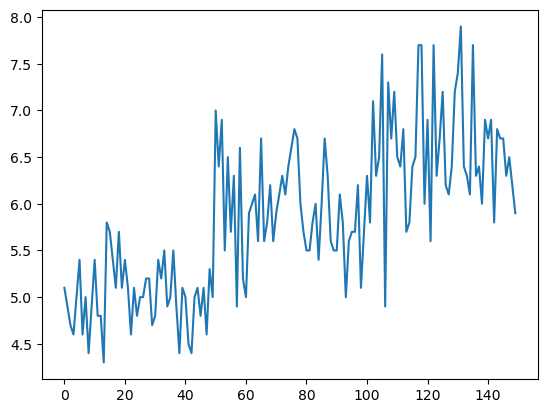

In [52]:
df['sepal_length'].plot()

<Axes: >

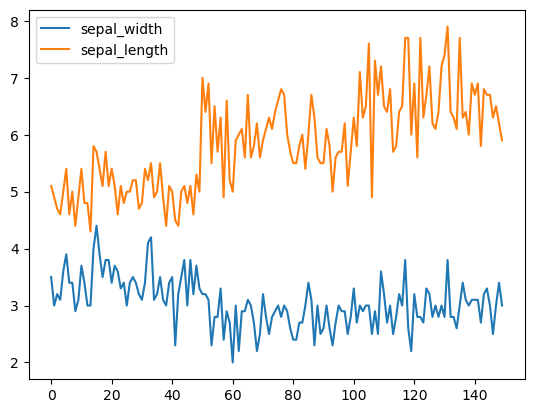

In [53]:
df[['sepal_width', 'sepal_length']].plot()

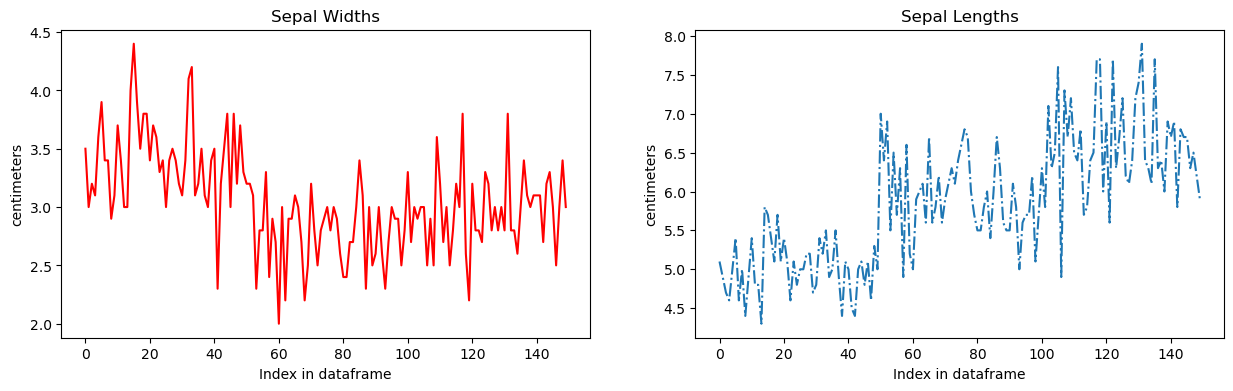

In [54]:
fig, ax = plt.subplots(1, 2)

df['sepal_width'].plot(ax = ax[0], color = 'r')
df['sepal_length'].plot(ax = ax[1], linestyle = '-.')

ax[0].set_title('Sepal Widths')
ax[1].set_title('Sepal Lengths')

ax[0].set_xlabel('Index in dataframe')
ax[1].set_xlabel('Index in dataframe')

ax[0].set_ylabel('centimeters')
ax[1].set_ylabel('centimeters')


fig.set_size_inches(15, 4)

<Axes: ylabel='Frequency'>

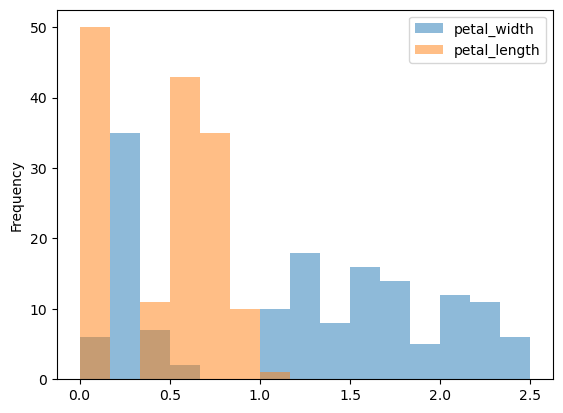

In [55]:
df[['petal_width', 'petal_length']].plot.hist(alpha = 0.5, bins = 15)

<Axes: ylabel='Density'>

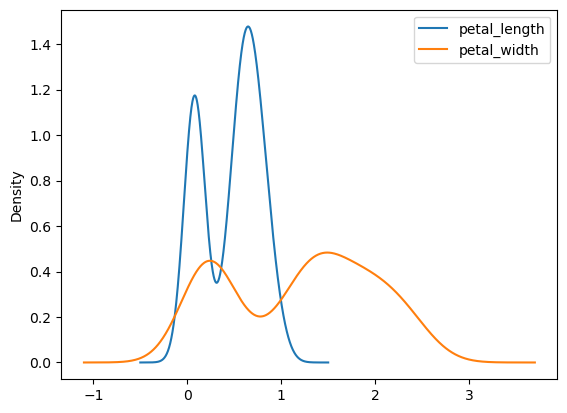

In [56]:
df[['petal_length', 'petal_width']].plot.kde()

#### Cool Plots using Seaborn & Pandas


Check out [seaborn](https://seaborn.pydata.org/examples/index.html) for more awesome plots.

In [57]:
import seaborn as sns

sns.set_theme()

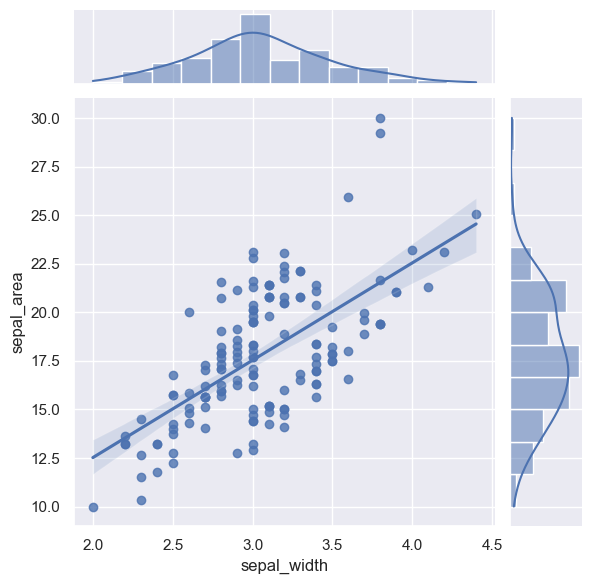

In [58]:
sns.jointplot(x = 'sepal_width', y = 'sepal_area', data = df, kind = 'reg')

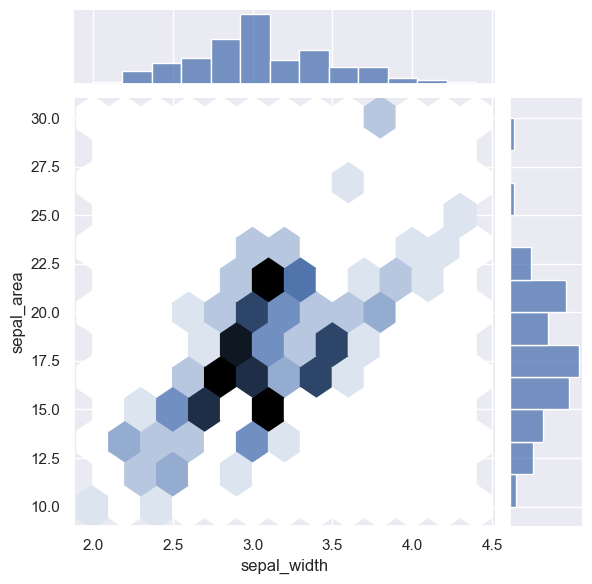

In [59]:
sns.jointplot(x = 'sepal_width', y = 'sepal_area', data = df, kind = 'hex')

/Users/albertarielwidiaatmaja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


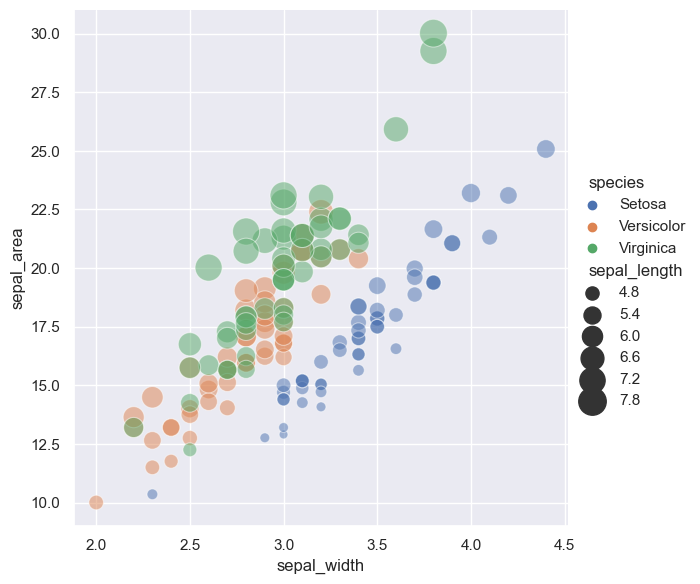

In [60]:
sns.relplot(x="sepal_width", y="sepal_area", hue="species", size="sepal_length", sizes=(40, 400), alpha=.5, height=6, data=df)

/Users/albertarielwidiaatmaja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


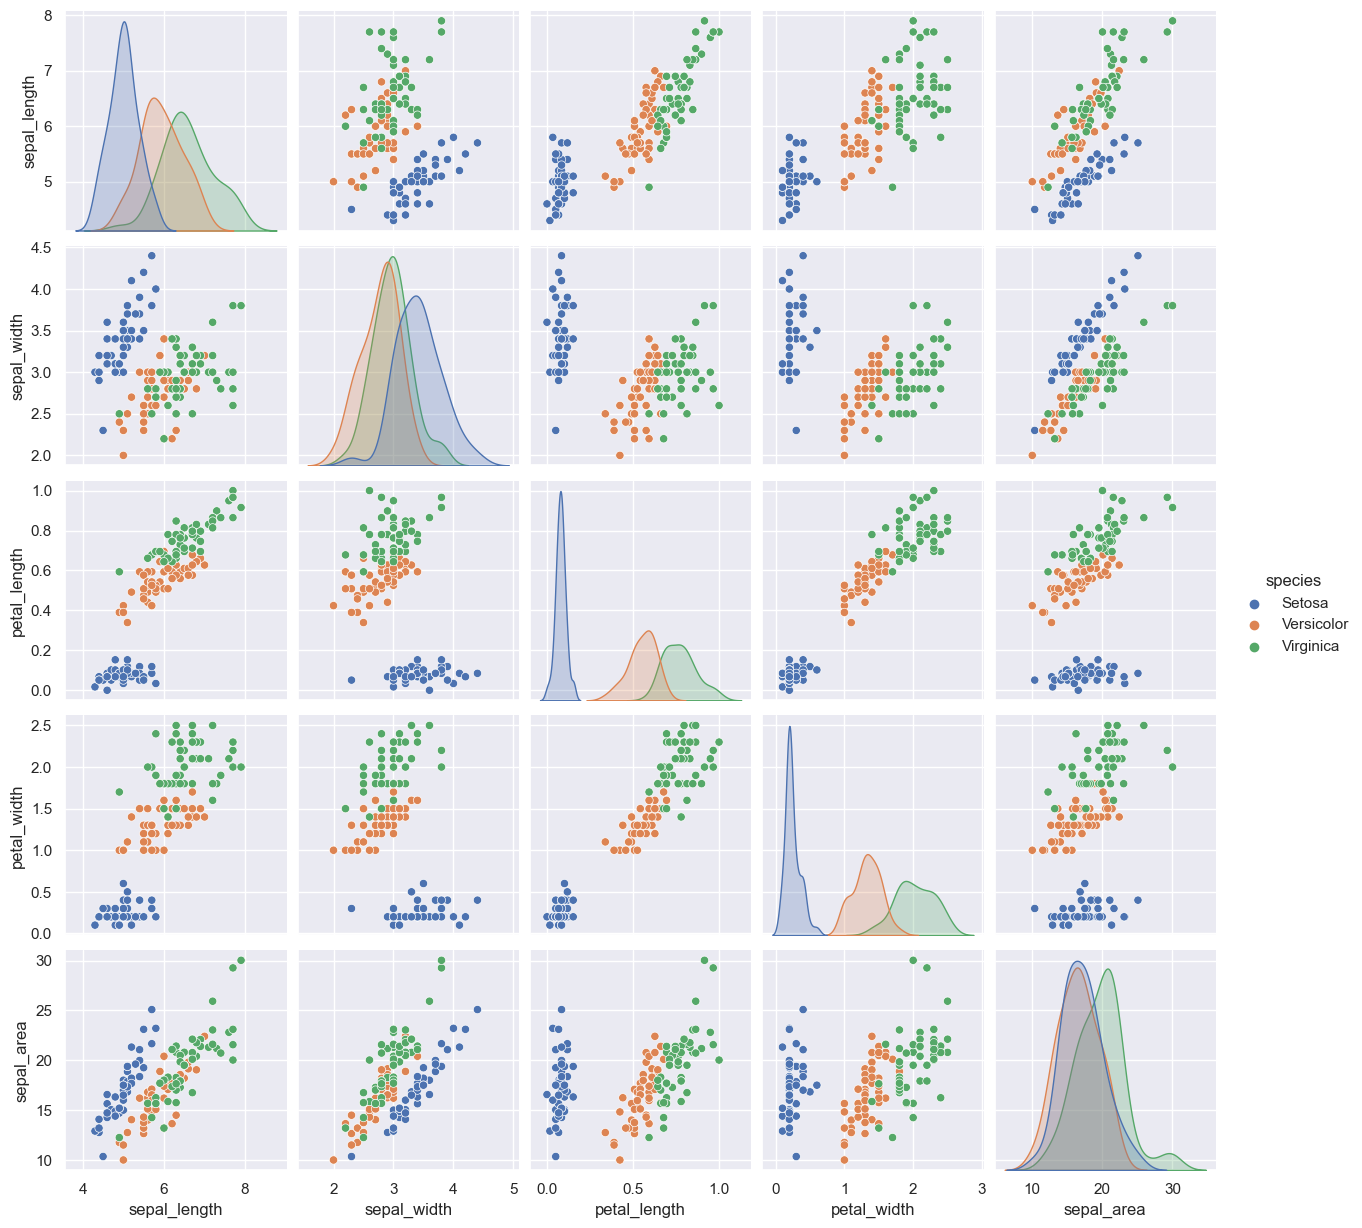

In [61]:
grid = sns.pairplot(df, hue = 'species')

/Users/albertarielwidiaatmaja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


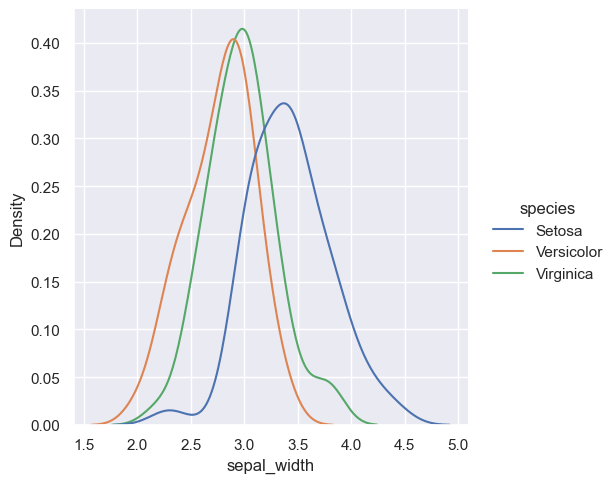

In [62]:
sns.displot(data = df, x = 'sepal_width', kind = 'kde', hue = 'species')

/Users/albertarielwidiaatmaja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


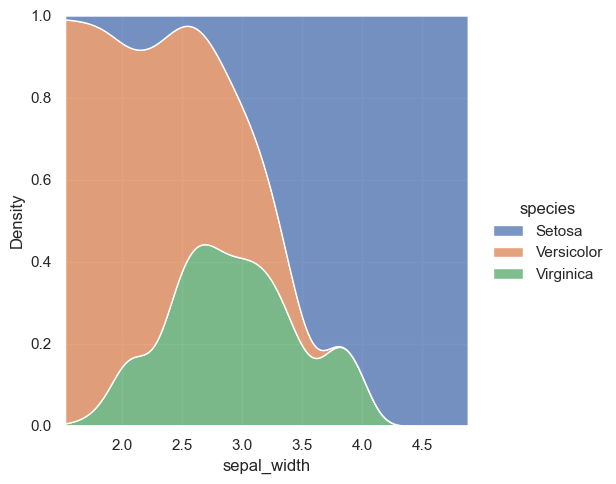

In [63]:
sns.displot(data = df, x = 'sepal_width', kind = 'kde', hue = 'species', multiple = 'fill')

In [64]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Setosa'

<Axes: >

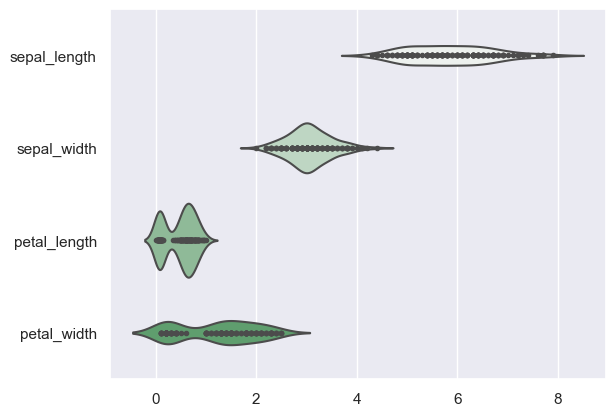

In [65]:
sns.violinplot(data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], palette="light:g", inner="points", orient="h")

#### 3D Plotting

In [66]:
from mpl_toolkits.mplot3d import Axes3D


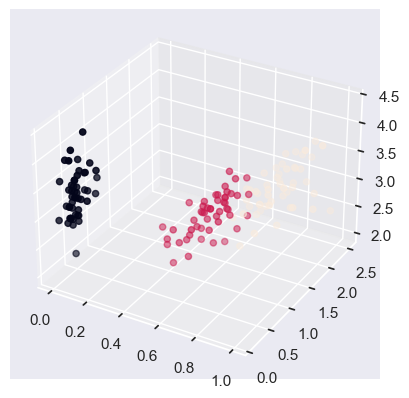

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['petal_length'], df['petal_width'], df['sepal_width'], zdir='z', s=20, c=df['species'].astype('category').cat.codes, depthshade=True)

## Exercises I: Numpy and Matplotlib



### 1. System of linear equations

Using numpy, solve the following linear equation:



$\begin{bmatrix}
   1 & 2 & 3.3 & 2 \\
   3 & 3.6 & 7 & 0 \\
   1 & 3 & -1 & 12 \\
   2 & 11 & 4 & 16
\end{bmatrix}
\begin{bmatrix}
   x_1 \\
   x_2 \\
   x_3 \\
   x_4
\end{bmatrix}=\begin{bmatrix}
   10 \\
   15 \\
   3 \\
   -1
\end{bmatrix}$

In [68]:
# Your code here
import numpy as np

# Coefficient matrix
A = np.array([
    [1, 2, 3.3, 2],
    [3, 3.6, 7, 0],
    [1, 3, -1, 12],
    [2, 11, 4, 16]
])

# Constant matrix
B = np.array([10, 15, 3, -1])

# Solving the system of equations
solution = np.linalg.solve(A, B)

# Printing the solution
print("Solution to the system of equations:")
print("x1 =", solution[0])
print("x2 =", solution[1])
print("x3 =", solution[2])
print("x4 =", solution[3])


Solution to the system of equations:
x1 = -1.2893729761554318
x2 = -4.34942596408596
x3 = 4.93229319988225
x4 = 1.8558286723579633


### 2. Simple numpy exercises
1. Given an matrix, calculate the sum for each row

2. Given an vector, normalize the vector using the $l_{10}$ norm

In [70]:
import numpy as np

# Given matrix and vector
M = np.array([
    [1, 2, 3],
    [9, 3, 10],
    [3, 5, 0],
    [1, 7, -3],
    [0, -2, 3],
])

v = np.array([100, 2302, 2, -10, 134, -1])

# Calculate the sum for each row of the matrix
row_sums = M.sum(axis=1)

# Normalize the vector using the L10 norm
l10_norm = np.linalg.norm(v, ord=10)
normalized_vector = v / l10_norm

# Output results
print("Sum for each row:", row_sums)
print("Normalized vector using L10 norm:", normalized_vector)


Sum for each row: [ 6 22  8  5  1]
Normalized vector using L10 norm: [ 4.34404865e-02  1.00000000e+00  8.68809731e-04 -4.34404865e-03
  5.82102520e-02 -4.34404865e-04]


### 3. Harder numpy exercises

Using the matrix and vector defined above:

1. Subtract the mean of each column in a given matrix.

2. Get the 3rd largest value in an array.


In [71]:
# Your code here
import numpy as np

# Subtract the mean of each column in the matrix
column_means = M.mean(axis=0)
M_centered = M - column_means

# Get the 3rd largest value in the vector
third_largest_value = np.sort(v)[-3]

# Output results
print("Matrix after subtracting column means:")
print(M_centered)
print("\nThe 3rd largest value in the vector:", third_largest_value)

Matrix after subtracting column means:
[[-1.8 -1.   0.4]
 [ 6.2  0.   7.4]
 [ 0.2  2.  -2.6]
 [-1.8  4.  -5.6]
 [-2.8 -5.   0.4]]

The 3rd largest value in the vector: 100


### 4. Plot some functions
Using numpy and matplotlib, plot the following functions (you can choose the colors and styling, interval of interest and other parameters):

$f_1(x) = max(0, x)$

$f_2(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$

$f_3(x) = \frac{1}{1 + e^{-x}}$

$f_4(x) = \frac{1}{\mu^2 + 1}*e^{-\frac{(x - \mu)^2}{b^2}}$

$f_5(x) = 0.5x (1 + tanh(0.797885x + 0.035677x^3))$

Note that all plots should have relevant ticks, labels and a title.  

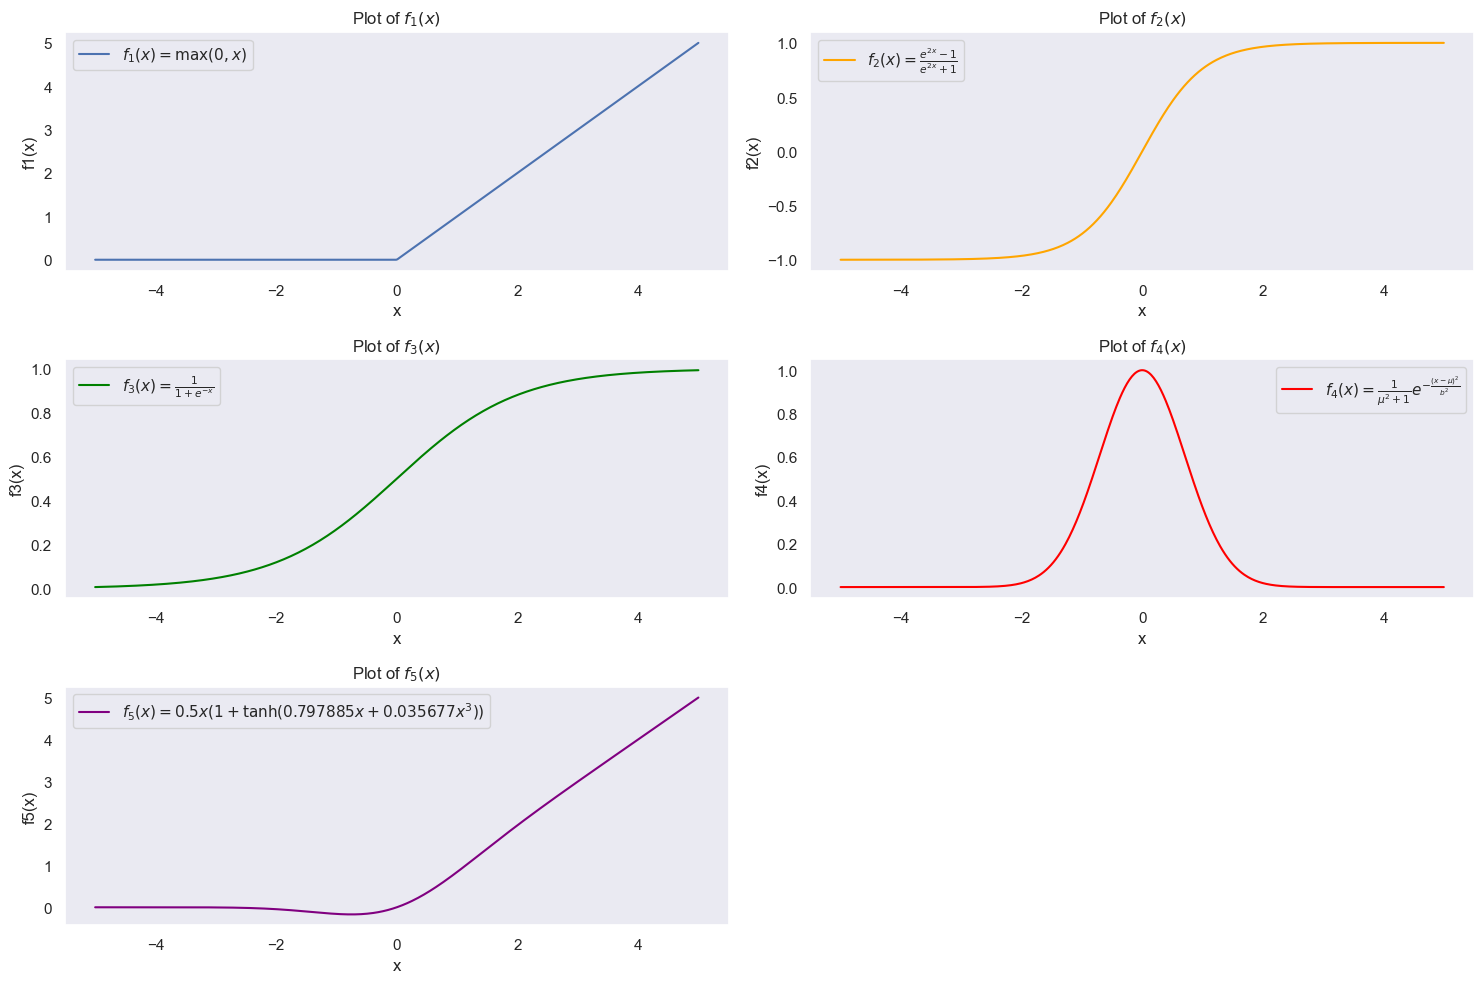

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return np.maximum(0, x)

def f2(x):
    return (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)

def f3(x):
    return 1 / (1 + np.exp(-x))

def f4(x, mu=0, b=1):
    return (1 / (mu**2 + 1)) * np.exp(-((x - mu)**2) / (b**2))

def f5(x):
    return 0.5 * x * (1 + np.tanh(0.797885 * x + 0.035677 * x**3))

# Define the range of x values
x = np.linspace(-5, 5, 500)

# Plotting
plt.figure(figsize=(15, 10))

# Plot f1(x)
plt.subplot(3, 2, 1)
plt.plot(x, f1(x), label=r"$f_1(x) = \max(0, x)$")
plt.title("Plot of $f_1(x)$")
plt.xlabel("x")
plt.ylabel("f1(x)")
plt.grid()
plt.legend()

# Plot f2(x)
plt.subplot(3, 2, 2)
plt.plot(x, f2(x), label=r"$f_2(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$", color='orange')
plt.title("Plot of $f_2(x)$")
plt.xlabel("x")
plt.ylabel("f2(x)")
plt.grid()
plt.legend()

# Plot f3(x)
plt.subplot(3, 2, 3)
plt.plot(x, f3(x), label=r"$f_3(x) = \frac{1}{1 + e^{-x}}$", color='green')
plt.title("Plot of $f_3(x)$")
plt.xlabel("x")
plt.ylabel("f3(x)")
plt.grid()
plt.legend()

# Plot f4(x) with parameters mu=0, b=1
plt.subplot(3, 2, 4)
plt.plot(x, f4(x, mu=0, b=1), label=r"$f_4(x) = \frac{1}{\mu^2 + 1}e^{-\frac{(x - \mu)^2}{b^2}}$", color='red')
plt.title("Plot of $f_4(x)$")
plt.xlabel("x")
plt.ylabel("f4(x)")
plt.grid()
plt.legend()

# Plot f5(x)
plt.subplot(3, 2, 5)
plt.plot(x, f5(x), label=r"$f_5(x) = 0.5x (1 + \tanh(0.797885x + 0.035677x^3))$", color='purple')
plt.title("Plot of $f_5(x)$")
plt.xlabel("x")
plt.ylabel("f5(x)")
plt.grid()
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### 5. Prettify Plot

Given the below plot, make it look presentable. Add **square** markers to scatter plots, **dashdotted** lines, add relevant axis **limits** and **ticks**, a **legend** and a **title**. 

**NB**: A plot should be self-contained. Any reader should understand it without have to refer to its text description. 


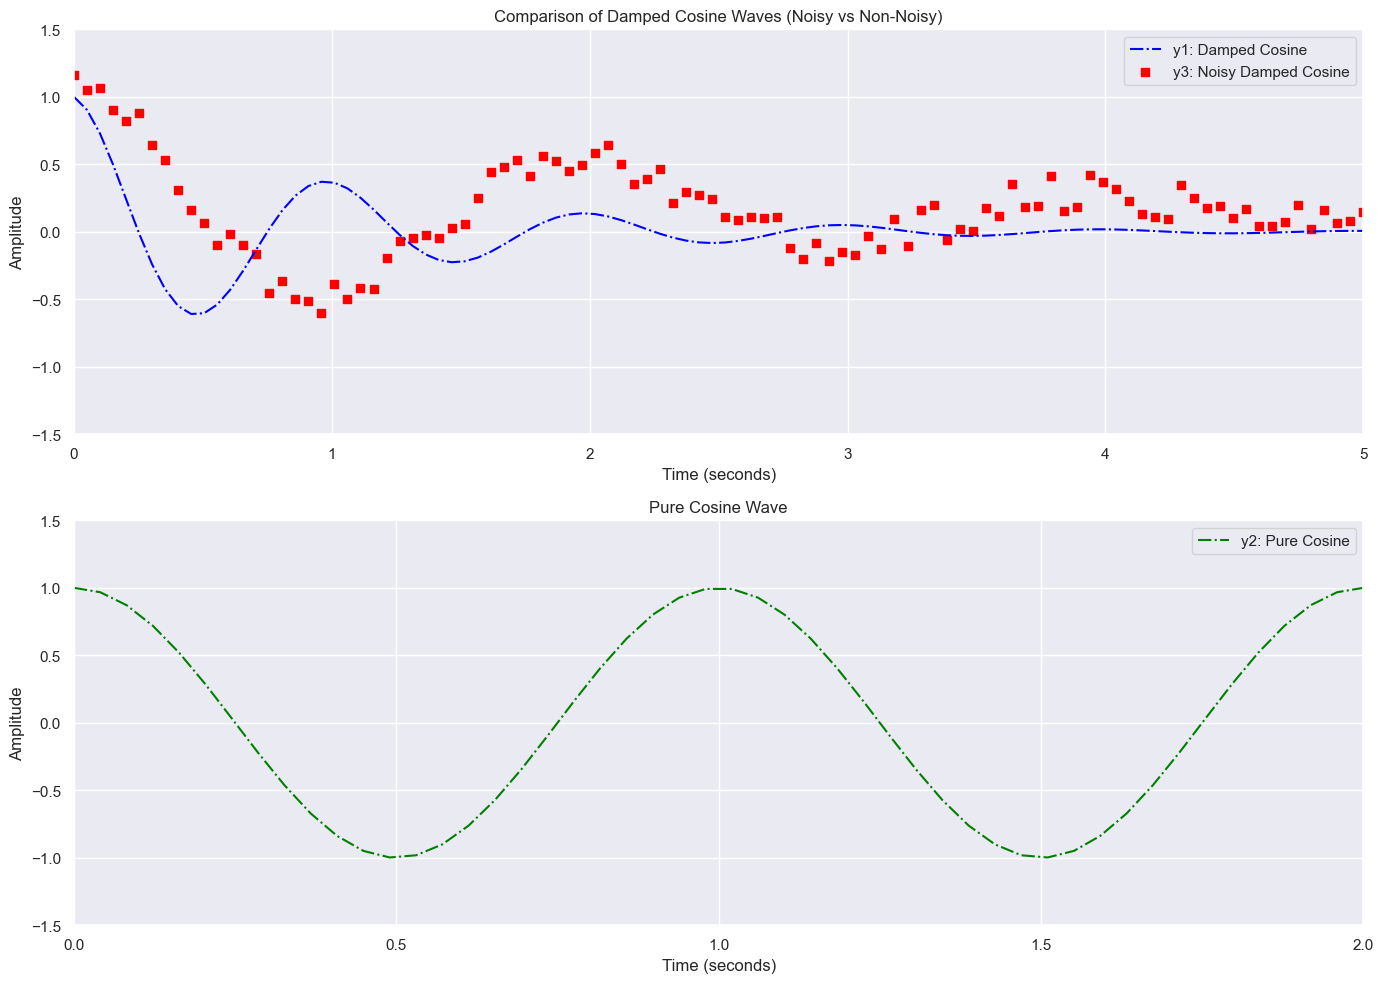

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Data Synthetization
x1 = np.linspace(0.0, 5.0, 100)
x2 = np.linspace(0.0, 2.0, 50)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)
y3 = np.cos(1 * np.pi * x1) * np.exp(-0.5 * x1) + 0.3 * np.random.random(size=x1.shape)

# Plotting with enhancements
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# First subplot
ax1.plot(x1, y1, linestyle='dashdot', label='y1: Damped Cosine', color='blue')
ax1.scatter(x1, y3, marker='s', label='y3: Noisy Damped Cosine', color='red')
ax1.set_xlim(0, 5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xticks(np.arange(0, 6, 1))
ax1.set_yticks(np.arange(-1.5, 1.6, 0.5))
ax1.set_title("Comparison of Damped Cosine Waves (Noisy vs Non-Noisy)")
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Amplitude")
ax1.legend()
ax1.grid(True)

# Second subplot
ax2.plot(x2, y2, linestyle='dashdot', label='y2: Pure Cosine', color='green')
ax2.set_xlim(0, 2)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xticks(np.arange(0, 2.5, 0.5))
ax2.set_yticks(np.arange(-1.5, 1.6, 0.5))
ax2.set_title("Pure Cosine Wave")
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Amplitude")
ax2.legend()
ax2.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()


## Exercises II: Pandas, Seaborn and Data Visualization

In [77]:
import pandas as pd
import requests
import json

covid_data = json.loads(requests.get('https://www.graphs.ro/json.php').content)

covid_df = pd.DataFrame(covid_data['covid_romania'])
covid_df.head()

covid_county_data_dfs = []

for i, row in covid_df.iterrows():
  try: # some days have no county information
    county_df = pd.DataFrame(row['county_data'])
  except:
    continue

  county_df['reporting_date'] = row['reporting_date']
  covid_county_data_dfs.append(county_df)


county_df = pd.concat(covid_county_data_dfs)
covid_df = covid_df.drop(['sourceUrl', 'county_data'], axis = 1)

In [78]:
covid_df.head()

,reporting_date,total_cases,new_cases_today,total_tests,new_tests_today,total_deaths,new_deaths_today,OLD_deaths,total_recovered,new_recovered_today,...,tests_upon_request,tests_done_before_today_and_reported_today,rapid_tests,infected_asymptomatic,infected_hospitalized,infected_positive_retests,persons_in_institutional_isolation,persons_in_home_quarantine,persons_in_institutional_quarantine,romania_population_2020
0,2022-11-21,3294446,215,13618262.0,865.0,67253.0,0.0,NaN,NaN,NaN,...,220.0,NaN,5762.0,NaN,650.0,15.0,NaN,NaN,NaN,19317984
1,2022-11-20,3294231,167,13617397.0,1227.0,67253.0,0.0,NaN,NaN,NaN,...,626.0,NaN,3889.0,NaN,628.0,13.0,NaN,NaN,NaN,19317984
2,2022-11-19,3294064,323,13616170.0,1743.0,67253.0,3.0,NaN,NaN,NaN,...,569.0,NaN,7709.0,NaN,613.0,19.0,NaN,NaN,NaN,19317984
3,2022-11-18,3293741,396,13614427.0,1877.0,67250.0,1.0,NaN,NaN,NaN,...,614.0,NaN,9474.0,NaN,619.0,32.0,NaN,NaN,NaN,19317984
4,2022-11-17,3293345,441,13612550.0,2469.0,67249.0,3.0,NaN,NaN,NaN,...,1022.0,NaN,10590.0,NaN,601.0,26.0,NaN,NaN,NaN,19317984


In [79]:
covid_df.to_csv("out.csv")

In [80]:
county_df.head()

,county_id,county_name,county_population,total_cases,reporting_date
0,AB,Alba,323778,59583,2022-11-21
1,AR,Arad,415732,78172,2022-11-21
2,AG,Arges,574920,81208,2022-11-21
3,BC,Bacau,580912,69291,2022-11-21
4,BH,Bihor,559992,92159,2022-11-21


### 1. Basic Visualizations

Make 4 subplots. Using pandas as seaborn, plot the number of new cases in a day, the number of recovered patients in day, number of tests in a day, and the number of deaths in day. We are trying to explore the evolution of COVID from the start of the pandemic until today.

**NB:** Make sure to add proper labels, title, axes and legend where necessary.

/Users/albertarielwidiaatmaja/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.graphs.ro'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


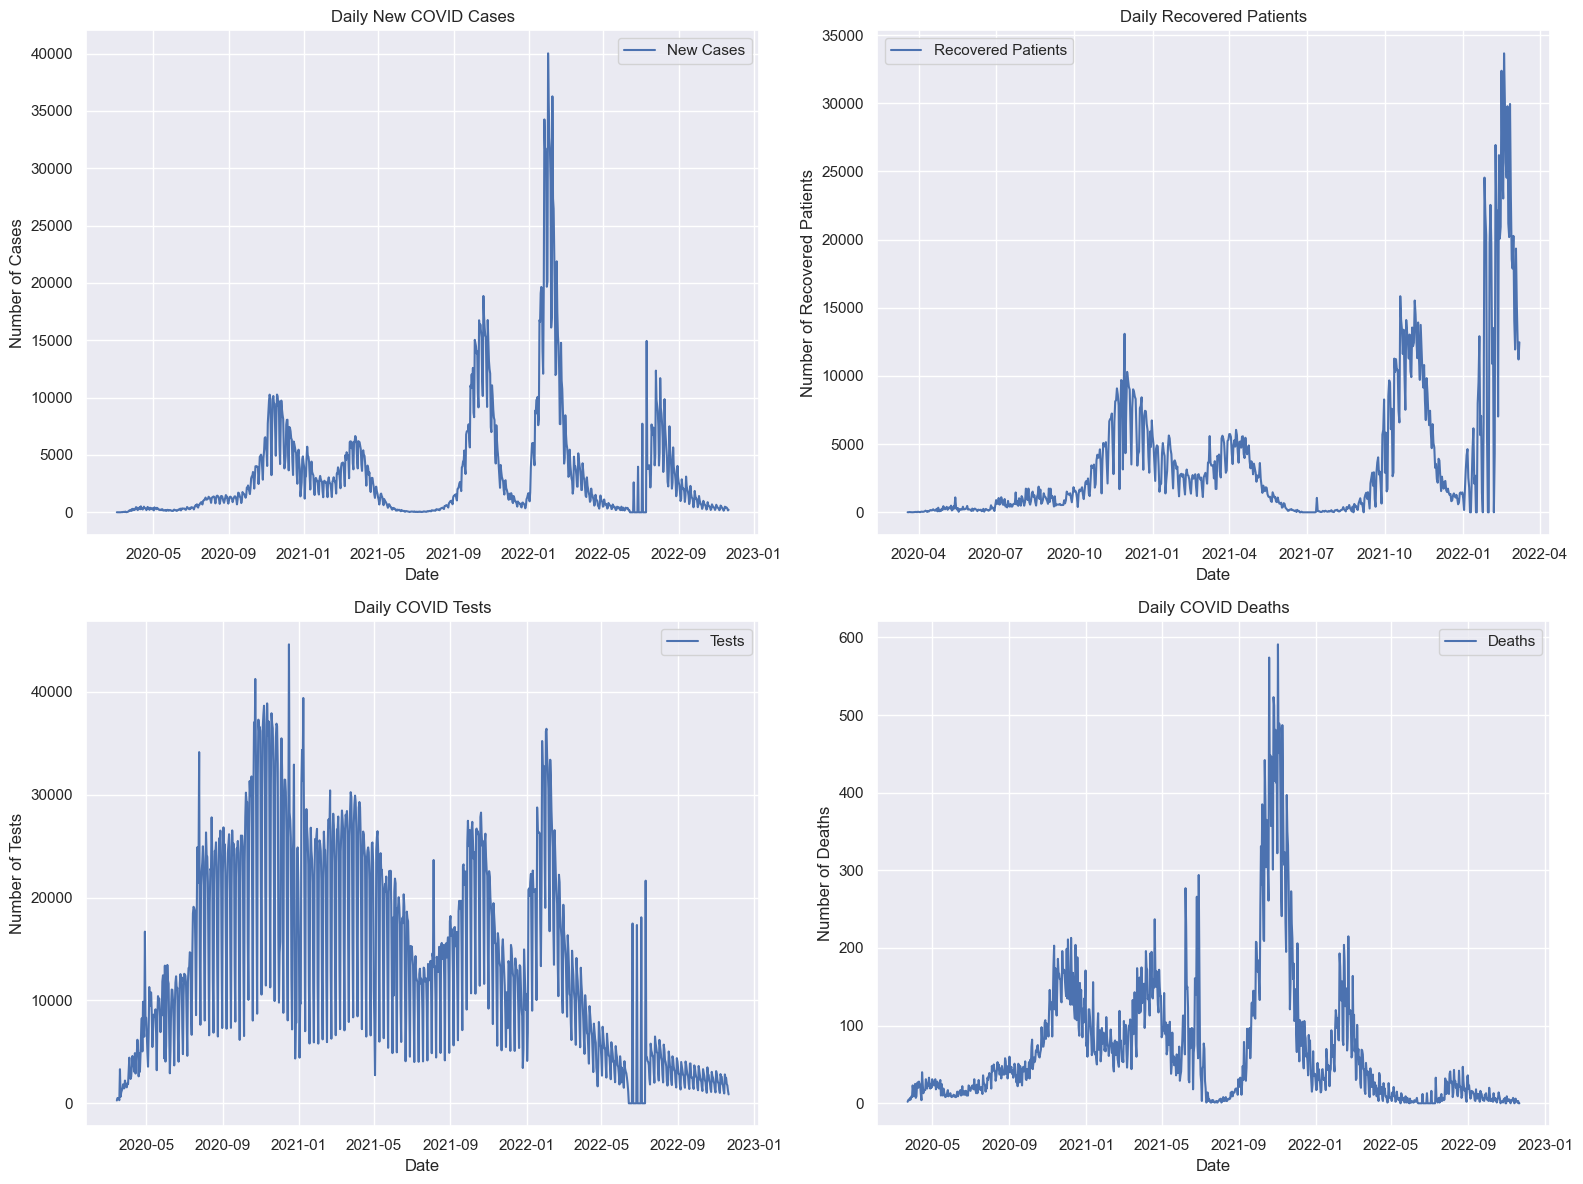

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

# Load the data with SSL verification disabled
url = 'https://www.graphs.ro/json.php'
response = requests.get(url, verify=False)  # Disable SSL verification
covid_data = json.loads(response.content)

# Create the main DataFrame
covid_df = pd.DataFrame(covid_data['covid_romania'])

# Preprocess the data
covid_df['reporting_date'] = pd.to_datetime(covid_df['reporting_date'])
covid_df = covid_df.drop(['sourceUrl', 'county_data'], axis=1)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Number of new cases in a day
sns.scatterplot(
    data=covid_df,
    x='reporting_date',
    y='new_cases_today',
    ax=axes[0, 0],
    label='New Cases'
)
axes[0, 0].set_title('Daily New COVID Cases')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Cases')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Subplot 2: Number of recovered patients in a day
sns.scatterplot(
    data=covid_df,
    x='reporting_date',
    y='new_recovered_today',
    ax=axes[0, 1],
    label='Recovered Patients'
)
axes[0, 1].set_title('Daily Recovered Patients')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Recovered Patients')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Subplot 3: Number of tests in a day
sns.scatterplot(
    data=covid_df,
    x='reporting_date',
    y='new_tests_today',
    ax=axes[1, 0],
    label='Tests'
)
axes[1, 0].set_title('Daily COVID Tests')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Number of Tests')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Subplot 4: Number of deaths in a day
sns.scatterplot(
    data=covid_df,
    x='reporting_date',
    y='new_deaths_today',
    ax=axes[1, 1],
    label='Deaths'
)
axes[1, 1].set_title('Daily COVID Deaths')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Number of Deaths')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### 2. Positive testing percentage

Using `pandas`, create a new column that computes the percentage of positive tests in a given day. This new column should be the number of infected people in a day over the number of tests per day.

Plot the evolution of positive tests across time. Compare this to the number of hospitalized patients. 

In a different plot, visualize the correlation between positive tests and the number of intensive care patients.

**NB:** Make sure to add proper labels, title, axes and legend where necessary.


/Users/albertarielwidiaatmaja/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.graphs.ro'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


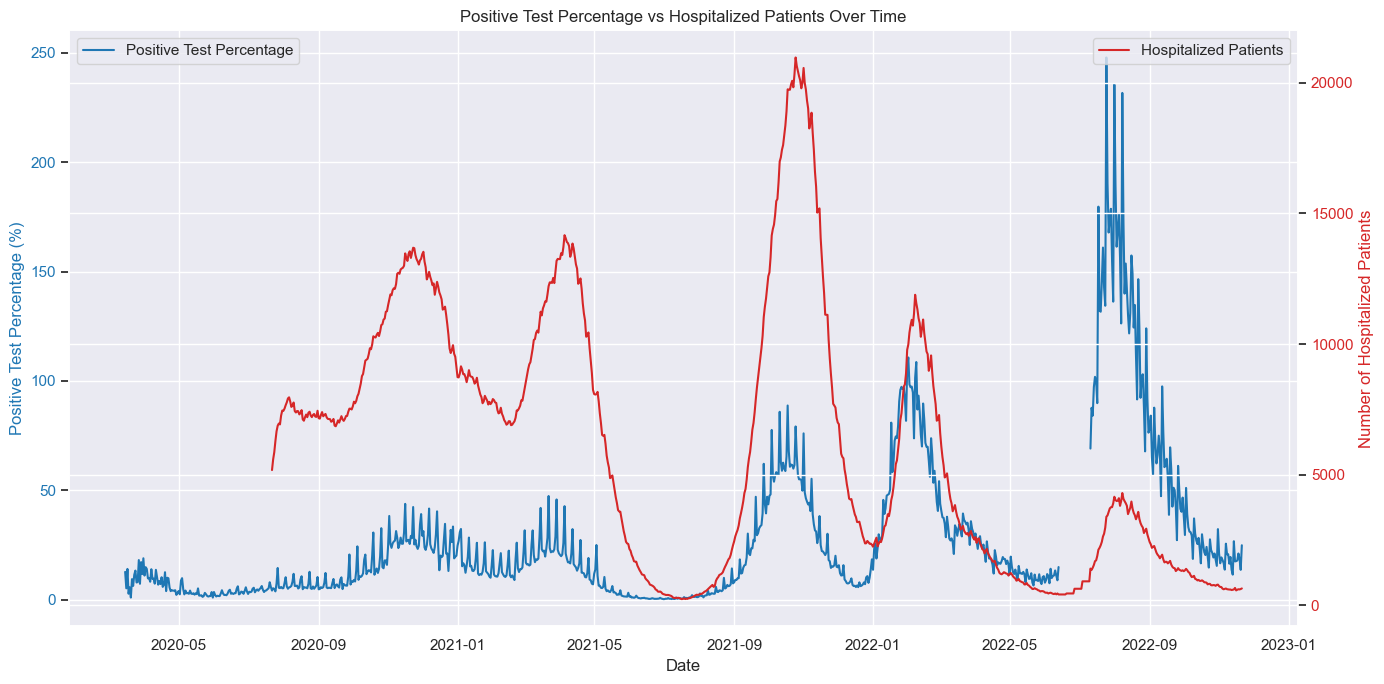

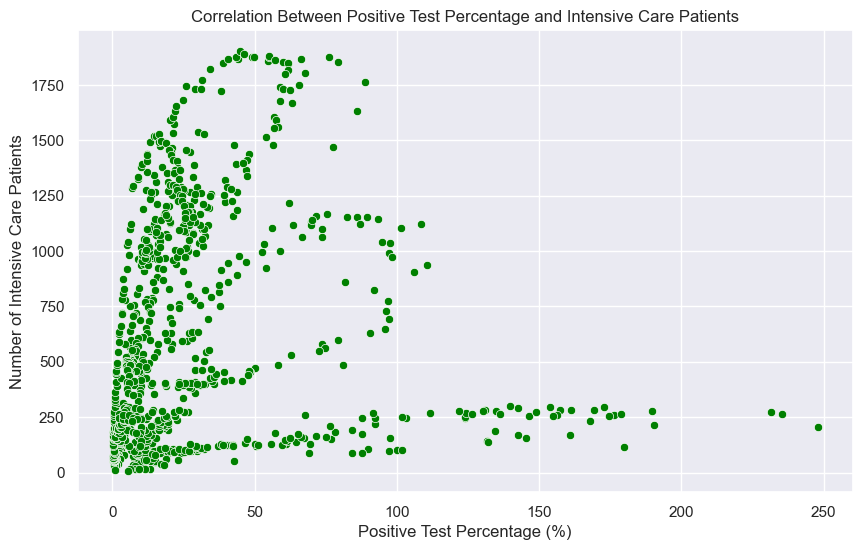

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

# Load the data
url = 'https://www.graphs.ro/json.php'
response = requests.get(url, verify=False)  # Disable SSL verification for the request
covid_data = json.loads(response.content)

# Create the main DataFrame
covid_df = pd.DataFrame(covid_data['covid_romania'])

# Preprocess the data
covid_df['reporting_date'] = pd.to_datetime(covid_df['reporting_date'])
covid_df = covid_df.drop(['sourceUrl', 'county_data'], axis=1)

# Calculate the percentage of positive tests per day
covid_df['positive_test_percentage'] = (covid_df['new_cases_today'] / covid_df['new_tests_today']) * 100

# Plot 1: Evolution of positive tests percentage across time vs hospitalized patients with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the positive test percentage on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Positive Test Percentage (%)', color=color)
ax1.plot(covid_df['reporting_date'], covid_df['positive_test_percentage'], color=color, label='Positive Test Percentage')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a secondary y-axis to plot the number of hospitalized patients
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Number of Hospitalized Patients', color=color)
ax2.plot(covid_df['reporting_date'], covid_df['infected_hospitalized'], color=color, label='Hospitalized Patients')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Set the title and show the plot
plt.title('Positive Test Percentage vs Hospitalized Patients Over Time')
plt.grid(True)
fig.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

# Plot 2: Correlation between positive tests and intensive care patients (unchanged)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=covid_df['positive_test_percentage'],
    y=covid_df['intensive_care_right_now'],
    color='green'
)
plt.title('Correlation Between Positive Test Percentage and Intensive Care Patients')
plt.xlabel('Positive Test Percentage (%)')
plt.ylabel('Number of Intensive Care Patients')
plt.grid(True)
plt.show()


### 3. County Information

Select at least 10 counties of your choosing, and plot the evolution of cases across time. 

Plot the number of positive cases on 1000 persons for each of your selected counties. Plot a horizontal line at the 3 / 1000 mark. When the number of positive cases per 1000 persons exceeds 3 / 1000, color your points in a different color from that point onwards.


**NB:** Make sure to add proper labels, title, axes and legend where necessary.


/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_81748/2905268488.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['reporting_date'] = pd.to_datetime(df_selected['reporting_date'])
/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_81748/2905268488.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cases_per_1000'] = (df_selected['total_cases'] / df_selected['county_population']) * 1000


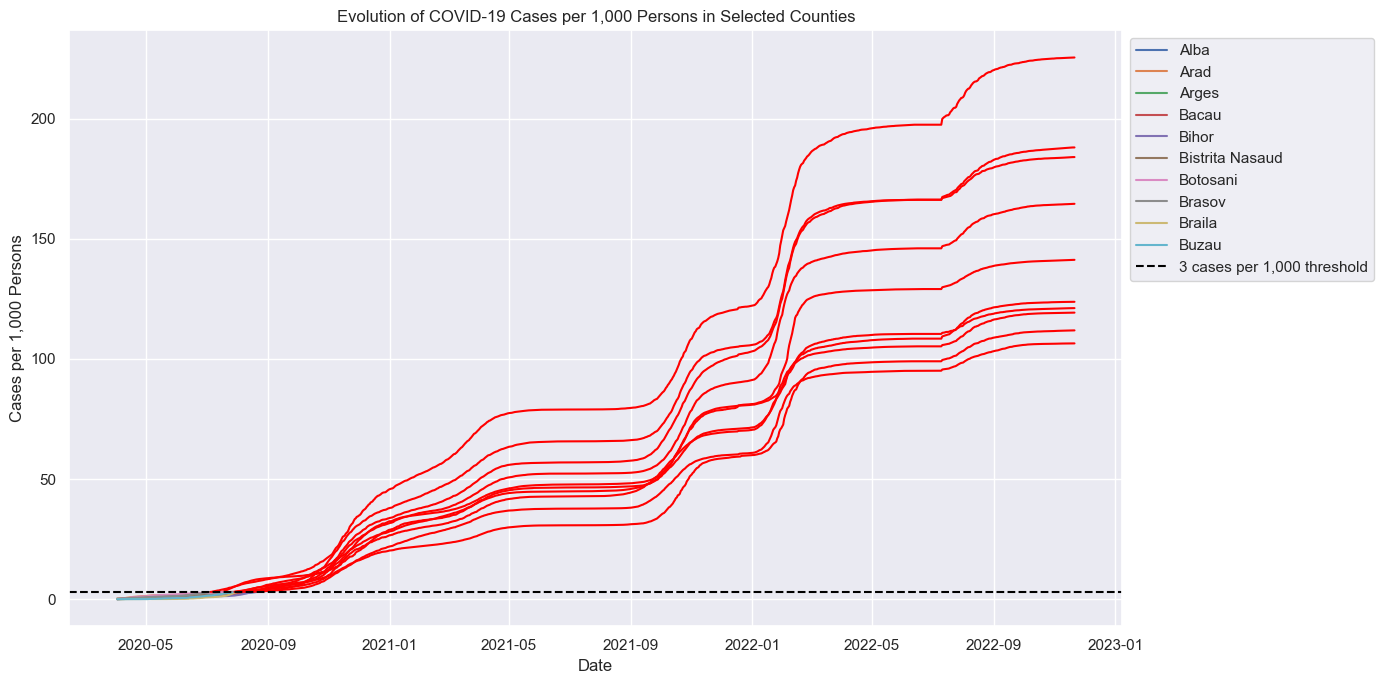

In [83]:
covid_county_data_combined_df = pd.concat(covid_county_data_dfs, ignore_index=True)

selected_counties = covid_county_data_combined_df['county_name'].unique()[:10]

# Filter data for selected counties
df_selected = covid_county_data_combined_df[covid_county_data_combined_df['county_name'].isin(selected_counties)]

# Convert 'date' to datetime format
df_selected['reporting_date'] = pd.to_datetime(df_selected['reporting_date'])

# Calculate cases per 1,000 persons
df_selected['cases_per_1000'] = (df_selected['total_cases'] / df_selected['county_population']) * 1000

# Plotting
plt.figure(figsize=(14, 7))

for county in selected_counties:
    df_county = df_selected[df_selected['county_name'] == county].sort_values('reporting_date')
    dates = df_county['reporting_date']
    cases_per_1000 = df_county['cases_per_1000']
    
    # Identify points where cases per 1,000 exceed 3
    threshold_exceeded = cases_per_1000 >= 3
    
    # Plot points before exceeding threshold
    plt.plot(dates[~threshold_exceeded], cases_per_1000[~threshold_exceeded], label=f'{county}')
    
    # Plot points after exceeding threshold in a different color
    plt.plot(dates[threshold_exceeded], cases_per_1000[threshold_exceeded], color='red')

# Add horizontal line at 3 cases per 1,000
plt.axhline(y=3, color='black', linestyle='--', label='3 cases per 1,000 threshold')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Cases per 1,000 Persons')
plt.title('Evolution of COVID-19 Cases per 1,000 Persons in Selected Counties')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## Open-ended question. 

Please choose one of the following two questions. 
1. Question 1  
More than 6 millions people have died because of the COVID-19 pandemic. However, some countries managed to keep the death toll low by swift responses and right policy. 
Download [this](https://github.com/owid/covid-19-data/tree/master/public/data) realtime dataset for Covid data. Visualize the effects of government's policies on COVID cases and death. Choose at least two countries and make constrastive comparison. The policy data is not provided and you need to find it yourself. Please note that we expect an extensive analysis and visualization for this question.

2. Question 2  
Using the [Multi-source dataset of urban life in Milan and the Province of Trentino](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/EGZHFV), please choose a few events or variables of interest and explore their ralationship. Your task is to identify and visualize behavior correlations between these events to gain insights into urban life patterns.  
Consider events like weather conditions (e.g., rain, temperature), time of day (morning, afternoon, evening), and individual behaviors (e.g., SMS and call activity, movement patterns). Explore how these events may be related to each other and how they influence urban life.

In [ ]:
# TODO your code here